# Face Recognition Using PCA
# Hansi Seitaj, Department of Computer Science
# Dr. Elangovan Vinyak, Department of Computer Science
# 03/06/2022

# 1. Introduction

To start, we collect similar images that contain a given face, with a white background. In addition, we choose these images are resized wtih 50 x 50 dimensions (width x height). We are implementing a face recognition project by applying the concept of Principal Component Analysis (PCA). Furthermore, PCA is an unsupervised learning that is used to determine the interelations among the attributes. This technique is used to reduce the dimensionality of the large dataset into a smaller one that have as much information as possible with a small portion of info lost. Moreover, the first part of the project consists of preparing the training images for the calculations. In the these steps, we calculated the covariance matrix, eigen values and selected the k value. Finally, we did the projection of training sample into the eigenface and we tested it to recognize a test face image. All in all, the results were concluded by computing the Euclidean distance and choosing the face with the minimum vector. 

## 2. Design and Implementation

In [275]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

Step-1:  Collect 10 images of faces (training faces) (face images should be centered).

Step-2:  Resize the image to 50 x 50.

Step-3:  Convert the images to gray scale images.

Step-4:  For each image, get the pixels values. Now you will have 50 x 50 pixels.

Step-5:  Represent every image I as a vector T. Now for each image you will have n2x1 vector where n is 50.


In [276]:
img1 = cv2.imread('1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('2.jpg', cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread('3.jpg', cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread('4.jpg', cv2.IMREAD_GRAYSCALE)
img5 = cv2.imread('5.jpg', cv2.IMREAD_GRAYSCALE)
img6 = cv2.imread('6.jpg', cv2.IMREAD_GRAYSCALE)
img7 = cv2.imread('7.jpg', cv2.IMREAD_GRAYSCALE)
img8 = cv2.imread('8.jpg', cv2.IMREAD_GRAYSCALE)
img9 = cv2.imread('9.jpg', cv2.IMREAD_GRAYSCALE)
img10 = cv2.imread('10.jpg', cv2.IMREAD_GRAYSCALE)

dim = (50, 50)
  
# resize image
resized1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)
resized2 = cv2.resize(img2, dim, interpolation = cv2.INTER_AREA)
resized3 = cv2.resize(img3, dim, interpolation = cv2.INTER_AREA)
resized4 = cv2.resize(img4, dim, interpolation = cv2.INTER_AREA)
resized5 = cv2.resize(img5, dim, interpolation = cv2.INTER_AREA)
resized6 = cv2.resize(img6, dim, interpolation = cv2.INTER_AREA)
resized7 = cv2.resize(img7, dim, interpolation = cv2.INTER_AREA)
resized8 = cv2.resize(img8, dim, interpolation = cv2.INTER_AREA)
resized9 = cv2.resize(img9, dim, interpolation = cv2.INTER_AREA)
resized10 = cv2.resize(img10, dim, interpolation = cv2.INTER_AREA)

faces = [resized1, resized2, resized3, resized4, resized5, resized6, resized7, resized8, resized9, resized10]

cv2.imshow("Resized image", resized1)
cv2.waitKey(0)
cv2.destroyAllWindows()

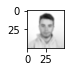

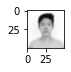

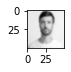

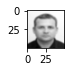

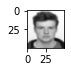

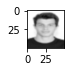

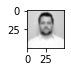

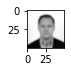

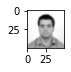

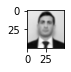

(2500, 10)
[[246 251 227 ... 236 232 228]
 [247 251 227 ... 236 232 229]
 [247 251 228 ... 237 233 229]
 ...
 [217 206 238 ...  44 158  20]
 [217 201 229 ...  44 169  20]
 [217 211 229 ...  45 165  21]]


In [277]:
total = 2500
facelabel = []
face_vector = []
for i in range(0, 10):
    #reads every image
    face_image = faces[i] 
    plt.subplot(5,5,1+i)
    #to display the images
    plt.imshow(face_image, cmap = 'gray', interpolation = 'bicubic')
    plt.show()
    face_image = face_image.reshape(total)
    face_vector.append(face_image)

face_vector = np.asarray(face_vector)
face_vector = face_vector.transpose()

print(face_vector.shape)
print(face_vector)

Step-6:  Compute the face vectors i.e. form a matrix that have each image vector in each column and compute the mean face. Display that face.

[[235.3]
 [235.3]
 [235.7]
 ...
 [123. ]
 [123.2]
 [122.8]]


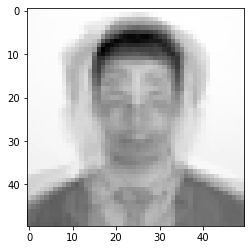

In [278]:
average_face = face_vector.mean(axis=1)
average_face = average_face.reshape(face_vector.shape[0], 1)
print(average_face)
plt.imshow(average_face.reshape(50, 50), cmap='gray')
plt.show()

Step-7:  Subtract the average face vector from the face vectors.

In [279]:
face_vector_average = face_vector - average_face
print(face_vector_average)
print(face_vector_average.shape)

[[  10.7   15.7   -8.3 ...    0.7   -3.3   -7.3]
 [  11.7   15.7   -8.3 ...    0.7   -3.3   -6.3]
 [  11.3   15.3   -7.7 ...    1.3   -2.7   -6.7]
 ...
 [  94.    83.   115.  ...  -79.    35.  -103. ]
 [  93.8   77.8  105.8 ...  -79.2   45.8 -103.2]
 [  94.2   88.2  106.2 ...  -77.8   42.2 -101.8]]
(2500, 10)


Step-8:  Calculate the covariance matrix, which results in n x n matrix.

In [280]:
covariance_matrix = np.cov(np.transpose(face_vector_average))
print(covariance_matrix)

[[ 1075.98535399   637.73713323   544.24477616  -807.00507444
   -523.71325621 -1082.82356094   896.25547496  -413.24303029
    451.40541315  -778.84322961]
 [  637.73713323  1181.03073176   639.62297396 -1006.5867377
   -473.70327673 -1056.10266125   936.44632039  -505.88689987
    400.59877574  -753.15635953]
 [  544.24477616   639.62297396  2067.41766371 -1381.25249101
   -452.57409414 -1532.02288227  1789.56678589 -1055.85972657
   -225.72950642  -393.41349931]
 [ -807.00507444 -1006.5867377  -1381.25249101  2609.45860502
    362.90199972  1147.23624513 -1968.45762765   881.23181251
   -188.54926242   351.02253084]
 [ -523.71325621  -473.70327673  -452.57409414   362.90199972
   2014.3419825   1054.68331586  -729.09299021  -429.86671548
   -591.694378    -231.2825873 ]
 [-1082.82356094 -1056.10266125 -1532.02288227  1147.23624513
   1054.68331586  3776.42921281 -1971.92621627   240.32043093
   -618.74036292    42.94647892]
 [  896.25547496   936.44632039  1789.56678589 -1968.457627

Step-9:  Calculate the eigenvalues and eigenvectors from the covariance matrix.

In [281]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("The Eigenvalues :\n")
print(eigenvalues,"\n")
print("The Eigenvectors:\n")
print(eigenvectors)

The Eigenvalues :

[9.69644369e+03 3.55508413e+03 3.02575147e+03 1.60334659e+03
 2.84965205e-13 1.19651295e+03 3.39220904e+02 4.65692704e+02
 7.74889498e+02 6.81429210e+02] 

The Eigenvectors:

[[ 0.22934893  0.0602033   0.24915511 -0.01791699 -0.31622777  0.01204995
  -0.47282491 -0.67767342 -0.28821729  0.12392047]
 [ 0.24591392  0.01285963  0.2236348  -0.09149263 -0.31622777  0.14797707
  -0.25371832  0.66761365 -0.2079401   0.45360806]
 [ 0.37094939 -0.13928896 -0.18445833  0.11816776 -0.31622777 -0.22959135
   0.11337786 -0.12859282  0.70200252  0.34654908]
 [-0.39743754  0.18710159  0.06961079  0.54343286 -0.31622777 -0.60312162
   0.02123133  0.09860641 -0.1749562   0.04829199]
 [-0.17292957 -0.49824118 -0.01407178  0.51894641 -0.31622777  0.57374375
   0.02304635 -0.01329712  0.01415308 -0.14918962]
 [-0.47590705 -0.5115991   0.09214989 -0.59362903 -0.31622777 -0.21809544
   0.00692339 -0.03072232  0.04082652  0.02583809]
 [ 0.50963104 -0.16949401 -0.17311425 -0.07464483 -0.316

Step-10: Choose the K best eigenvectors from step-9.

In [282]:
k = 10
k_besteigenvectors = eigenvectors[:k, :]
print(k_besteigenvectors.shape)

(10, 10)


Step-11:  Multiply each eigenvalues i.e. eigen vectors with the (face vector -average face vector) i.e. step-7

In [283]:
eigen_faces = np.matmul(face_vector_average, k_besteigenvectors)
eigen_weight = np.transpose(face_vector_average).dot(eigen_f)

Step-12:  Graphically display each face with respect to the eigenvalues.

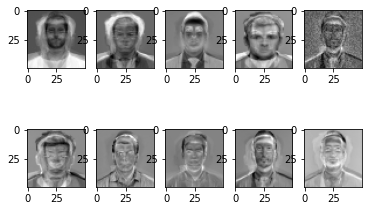

In [284]:
eigen_faces = np.transpose(eigen_faces)
for i in range(eigen_faces.shape[0]):
    img = eigen_faces[i].reshape(50,50)
    plt.subplot(2,5,1+i)
    plt.imshow(img, cmap='gray')
plt.show()

Step-13:  read the test image and separate the face from the image. If you already have a separated face image i.e. image which have a face centered and resized to 50 x 50, you can skip Step-13.


Step-14:  calculate the feature vector of the test face and subtract it with the average face.

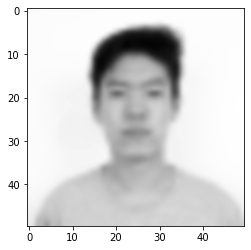

In [330]:
img_test = resized2
plt.imshow(img_test, cmap = 'gray',interpolation = 'bicubic')
plt.show()

In [331]:
img_test = img_test.reshape(total, 1)
feature_vector_test = img_test - average_face
print(feature_vector_test)

[[15.7]
 [15.7]
 [15.3]
 ...
 [83. ]
 [77.8]
 [88.2]]


Step-15: project the test image on the eigenspace.

In [332]:
test_project = np.transpose(feature_vector_test).dot(np.transpose(eigen_faces))
print(test_project)

[[ 9.01404783e+06  1.07313289e+06  3.40138133e+06 -1.05991885e+06
   1.26644852e-10 -4.92016153e+05 -1.43940085e+06  6.47922489e+05
  -3.65938482e+05  2.07826999e+06]]


Step-16: calculate the Euclidean distance (e) it with each eigenface vectors.

In [339]:
e = np.linalg.norm(test_project.transpose() - eigen_weight.transpose(), axis = 0)
best_match = np.argmin(e)
print("Best matching face number #{s} with Euclidean distance {f}".format(s = best_match + 1, f = e[best_match]))


Best matching face number #2 with Euclidean distance 3.898175351846316e-09


Step-17: if e < threshold, then it is recognized as face ‘i’ from the training set.  e is called the distance within face space. 

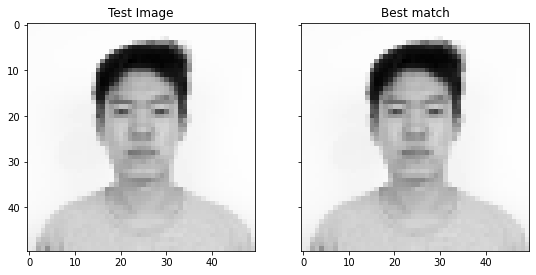

In [340]:
x = face_vector.transpose()

fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(9,6))
axes[0].imshow(img_test.reshape(50, 50), cmap="gray")
axes[0].set_title("Test Image")

axes[1].imshow(x[best_match].reshape(50, 50), cmap = "gray")
axes[1].set_title("Best match")
plt.show()

# Conclusion

All in all, we are able to usa PCA to reduce the dimensionality of 10 images and use them to train the algorithm. By implementing all these steps 1-17, I can be part and implement the face recognition process. Finally, If the best match’s distance is less than the threshold, we would consider the face is recognized to be the same person. If the distance is above the threshold, we claim the picture is someone we never saw even if a best match can be find numerically. In other words, the algorithm used the e to detect the similarity and based on the calculations of the eigenspace select the best match.

# References

https://machinelearningmastery.com/face-recognition-using-principal-component-analysis/